In [9]:
import pickle

with open("../data/survival/cox_v1/level_121.pickle", "rb") as fp:
    cph = pickle.load(fp)

In [20]:
x = cph.baseline_survival_.reset_index()
x.columns = ["time", "baseline"]
sec_per_hour = 3600
x["time"] = x.time / sec_per_hour

x.loc[x.baseline <= .5].iloc[0].time

53.646388888888886

In [31]:
res = []
for i in range(5, 200):
    with open(f"../data/survival/cox_v1/level_{i}.pickle", "rb") as fp:
        cph = pickle.load(fp)
        x = cph.baseline_survival_.reset_index()
        x.columns = ["time", "baseline"]
        sec_per_hour = 3600
        x["time"] = x.time / sec_per_hour
        res.append(dict(
            level=i,
            p95=x.loc[x.baseline <= .95].iloc[0].time,
            p90=x.loc[x.baseline <= .9].iloc[0].time,
            p50=x.loc[x.baseline <= .5].iloc[0].time
        ))

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(res)

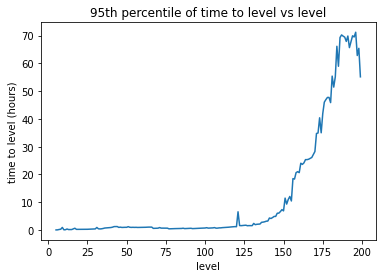

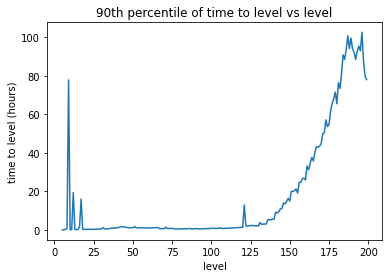

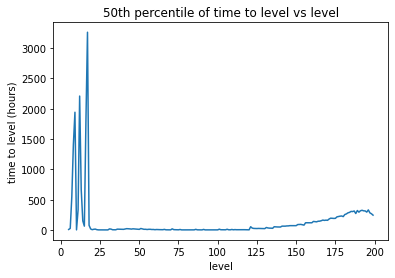

In [40]:
plt.title("95th percentile of time to level vs level")
plt.plot(df.level, df.p95)
plt.xlabel("level")
plt.ylabel("time to level (hours)")
plt.show()

plt.title("90th percentile of time to level vs level")
plt.plot(df.level, df.p90)
plt.xlabel("level")
plt.ylabel("time to level (hours)")
plt.show()

plt.title("50th percentile of time to level vs level")
plt.plot(df.level, df.p50)
plt.xlabel("level")
plt.ylabel("time to level (hours)")
plt.show()

In [42]:
df = pd.DataFrame(res)
df = df[df.level >= 30]

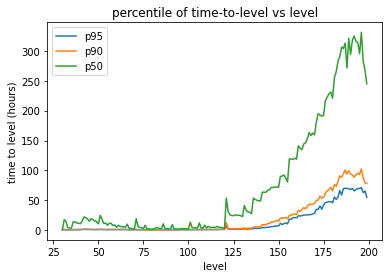

In [48]:
plt.title("percentile of time-to-level vs level")
plt.plot(df.level, df.p95, label="p95")
plt.plot(df.level, df.p90, label="p90")
plt.plot(df.level, df.p50, label="p50")
plt.legend()
plt.xlabel("level")
plt.ylabel("time to level (hours)")
plt.show()